In [1]:
import matplotlib.pyplot as plt 

from tensorflow import keras
from keras.datasets import mnist 
from keras.models import Sequential

11501568/11490434 [==============================] - 0s 0us/step


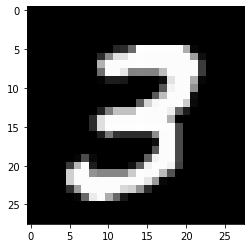

Label: 3


In [2]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()
plt.imshow(x_train[7],cmap = 'gray')
plt.show()
print('Label:',y_train[7])

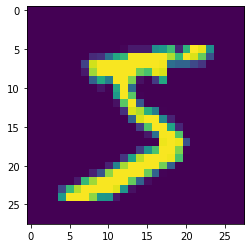

Label: 5


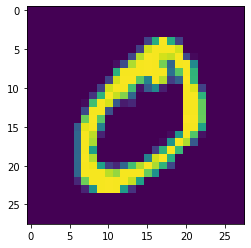

Label: 0


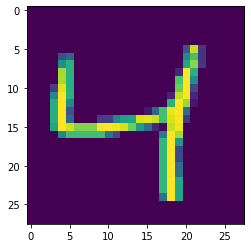

Label: 4


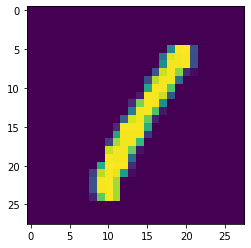

Label: 1


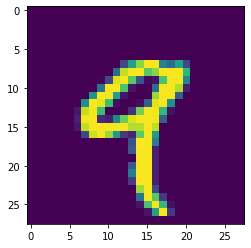

Label: 9


In [3]:
for i in range(0,5): 
  plt.imshow(x_train[i])
  plt.show()
  print('Label:',y_train[i])

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [6]:
x_train.shape

(60000, 784)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
to_categorical?

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
#Can you guys try building a NN model?
SEQUENTIAL MODEL!!

1. i/p , 1 hidden , 1 o/p
2. Activation - i/p, hidden - Sigmoid
3. SGD Optimizer 
4. 30 epochs - 100 batch_size 

In [14]:
from keras.layers import Dense, Activation
from keras import optimizers, losses

In [15]:
model = Sequential()
model.add(Dense(10,input_shape=(x_train.shape[1],), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [18]:
import tensorflow as tf
sgd = tf.keras.optimizers.SGD()
losses = losses.categorical_crossentropy
model.compile(optimizer = sgd,loss = losses, metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, batch_size = 100,epochs = 30, validation_split = 0.3,verbose = 1)

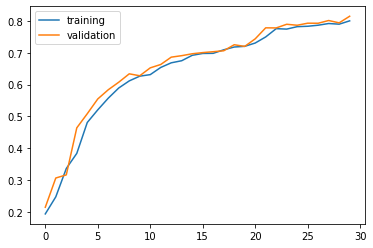

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [21]:
#Adding initializer
model = Sequential()
model.add(Dense(10,input_shape=(x_train.shape[1],),kernel_initializer = 'he_normal', activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

#To try - Add initializer to every layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
420/420 [==============================] - 2s 3ms/step - loss: 2.2693 - accuracy: 0.2167 - val_loss: 2.1837 - val_accuracy: 0.3426
Epoch 2/30
420/420 [==============================] - 1s 2ms/step - loss: 2.1467 - accuracy: 0.4104 - val_loss: 2.1078 - val_accuracy: 0.4627
Epoch 3/30
420/420 [==============================] - 1s 3ms/step - loss: 2.0754 - accuracy: 0.4830 - val_loss: 2.0371 - val_accuracy: 0.5154
Epoch 4/30
420/420 [==============================] - 1s 3ms/step - loss: 2.0017 - accuracy: 0.5332 - val_loss: 1.9592 - val_accuracy: 0.5900
Epoch 5/30
420/420 [==============================] - 1s 3ms/step - loss: 1.9219 - accuracy: 0.5955 - val_loss: 1.8798 - val_accuracy: 0.6204
Epoch 6/30
420/420 [==============================] - 1s 2ms/step - loss: 1.8350 - accuracy: 0.6318 - val_loss: 1.7891 - val_accuracy: 0.6447
Epoch 7/30
420/420 [==============================] - 1s 3ms/step - loss: 1.7493 - accuracy: 0.6523 - val_loss: 1.7074 - val_accuracy: 0.6656
Epoch 

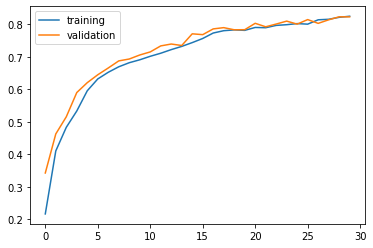

In [24]:
model.compile(optimizer = sgd,loss = losses, metrics = ['accuracy'])
history = model.fit(x_train,y_train, batch_size = 100,epochs = 30, validation_split = 0.3,verbose = 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

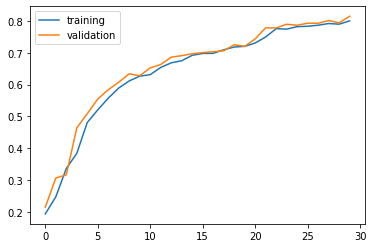

In [34]:
## Trying out non-saturating acctivation functions
model = Sequential()
model.add(Dense(10,input_shape=(x_train.shape[1],), activation = 'sigmoid'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                7850      
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
420/420 [==============================] - 2s 3ms/step - loss: 2.1758 - accuracy: 0.2884 - val_loss: 2.0498 - val_accuracy: 0.4303
Epoch 2/30
420/420 [==============================] - 1s 3ms/step - loss: 1.9232 - accuracy: 0.4296 - val_loss: 1.7737 - val_accuracy: 0.3868
Epoch 3/30
420/420 [==============================] - 1s 2ms/step - loss: 1.6398 - accuracy: 0.4282 - val_loss: 1.4787 - val_accuracy: 0.4947
Epoch 4/30
420/420 [==============================] - 1s 3ms/step - loss: 1.3771 - accuracy: 0.6090 - val_loss: 1.2545 - val_accuracy: 0.6909
Epoch 5/30
420/420 [==============================] - 1s 2ms/step - loss: 1.1854 - accuracy: 0.7081 - val_loss: 1.1018 - val_accuracy: 0.7415
Epoch 6/30
420/420 [==============================] - 1s 3ms/step - loss: 1.0481 - accuracy: 0.7290 - val_loss: 0.9665 - val_accuracy: 0.7524
Epoch 7/30
420/420 [==============================] - 1s 2ms/step - loss: 0.9570 - accuracy: 0.7385 - val_loss: 0.9218 - val_accuracy: 0.7474
Epoch 

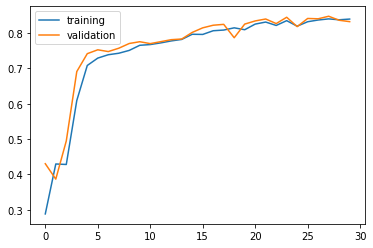

In [36]:
model.compile(optimizer = sgd,loss = losses, metrics = ['accuracy'])
history = model.fit(x_train,y_train, batch_size = 100,epochs = 30, validation_split = 0.3,verbose = 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

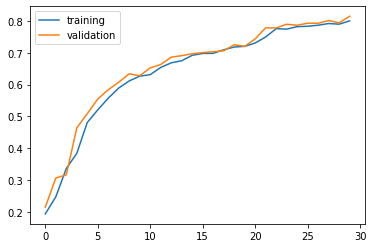

In [37]:
## Trying out Optimizer
model = Sequential()
model.add(Dense(10,input_shape=(x_train.shape[1],), activation = 'sigmoid'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Epoch 1/30
420/420 [==============================] - 2s 3ms/step - loss: 1.7018 - accuracy: 0.4293 - val_loss: 1.1382 - val_accuracy: 0.6781
Epoch 2/30
420/420 [==============================] - 1s 3ms/step - loss: 0.9462 - accuracy: 0.7018 - val_loss: 0.8134 - val_accuracy: 0.7404
Epoch 3/30
420/420 [==============================] - 1s 3ms/step - loss: 0.7619 - accuracy: 0.7555 - val_loss: 0.6888 - val_accuracy: 0.7932
Epoch 4/30
420/420 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.7845 - val_loss: 0.6486 - val_accuracy: 0.8033
Epoch 5/30
420/420 [==============================] - 1s 3ms/step - loss: 0.6301 - accuracy: 0.8063 - val_loss: 0.6081 - val_accuracy: 0.8260
Epoch 6/30
420/420 [==============================] - 1s 3ms/step - loss: 0.5952 - accuracy: 0.8214 - val_loss: 0.5725 - val_accuracy: 0.8303
Epoch 7/30
420/420 [==============================] - 1s 3ms/step - loss: 0.5637 - accuracy: 0.8306 - val_loss: 0.5418 - val_accuracy: 0.8379
Epoch 

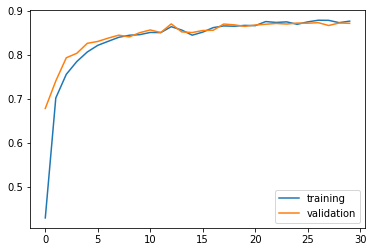

In [39]:
import tensorflow as tf
adm = tf.keras.optimizers.Adam()
model.compile(optimizer = adm,loss = losses, metrics = ['accuracy'])
history = model.fit(x_train,y_train, batch_size = 100,epochs = 30, validation_split = 0.3,verbose = 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [42]:
#Adding more hidden layers and neurons
model = Sequential()
model.add(Dense(64,input_shape=(x_train.shape[1],), activation = 'sigmoid'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

Epoch 1/30
420/420 [==============================] - 2s 4ms/step - loss: 0.8497 - accuracy: 0.7452 - val_loss: 0.4339 - val_accuracy: 0.8706
Epoch 2/30
420/420 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8690 - val_loss: 0.4080 - val_accuracy: 0.8766
Epoch 3/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.8838 - val_loss: 0.3790 - val_accuracy: 0.8856
Epoch 4/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8896 - val_loss: 0.3485 - val_accuracy: 0.8922
Epoch 5/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8929 - val_loss: 0.3419 - val_accuracy: 0.8938
Epoch 6/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8976 - val_loss: 0.3408 - val_accuracy: 0.8956
Epoch 7/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.9002 - val_loss: 0.3183 - val_accuracy: 0.9006
Epoch 

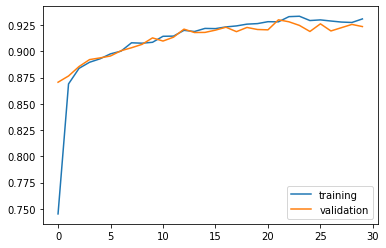

In [43]:
import tensorflow as tf
adm = tf.keras.optimizers.Adam()
model.compile(optimizer = adm,loss = losses, metrics = ['accuracy'])
history = model.fit(x_train,y_train, batch_size = 100,epochs = 30, validation_split = 0.3,verbose = 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()

In [44]:
from keras.layers import Dropout

In [47]:
#Adding more hidden layers and neurons
model = Sequential()
model.add(Dense(64,input_shape=(x_train.shape[1],), activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

Epoch 1/30
420/420 [==============================] - 3s 4ms/step - loss: 1.0330 - accuracy: 0.6651 - val_loss: 0.4526 - val_accuracy: 0.8685
Epoch 2/30
420/420 [==============================] - 1s 3ms/step - loss: 0.5233 - accuracy: 0.8361 - val_loss: 0.3831 - val_accuracy: 0.8816
Epoch 3/30
420/420 [==============================] - 1s 3ms/step - loss: 0.4773 - accuracy: 0.8510 - val_loss: 0.3515 - val_accuracy: 0.8948
Epoch 4/30
420/420 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.8600 - val_loss: 0.3079 - val_accuracy: 0.9070
Epoch 5/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3918 - accuracy: 0.8775 - val_loss: 0.3078 - val_accuracy: 0.9097
Epoch 6/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3855 - accuracy: 0.8813 - val_loss: 0.2724 - val_accuracy: 0.9169
Epoch 7/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8850 - val_loss: 0.2795 - val_accuracy: 0.9154
Epoch 

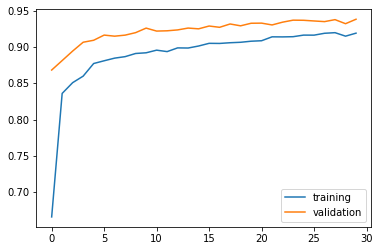

In [48]:
import tensorflow as tf
adm = tf.keras.optimizers.Adam()
model.compile(optimizer = adm,loss = losses, metrics = ['accuracy'])
history = model.fit(x_train,y_train, batch_size = 100,epochs = 30, validation_split = 0.3,verbose = 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.show()